In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [4]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


8


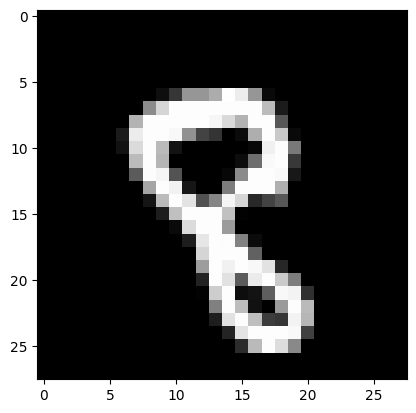

In [5]:
plt.imshow(train_X[6284], cmap = 'gray')
print(train_Y[6284])

In [6]:
# print(np.unique(train_Y), len(np.unique(train_Y)))
train_Y[0]
for i in train_Y:
    temp = np.zeros(len(np.unique(train_Y)))
    temp[i] = 1
    print(temp, 5)
    break

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5


In [7]:
print(np.unique(train_Y), len(np.unique(train_Y)))

[0 1 2 3 4 5 6 7 8 9] 10


In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [10]:
train_X = train_X/255
test_X = test_X/255

In [11]:
print(train_X.shape, test_X.shape)
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
# a = np.array([[1,2,3]])
# print(a.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


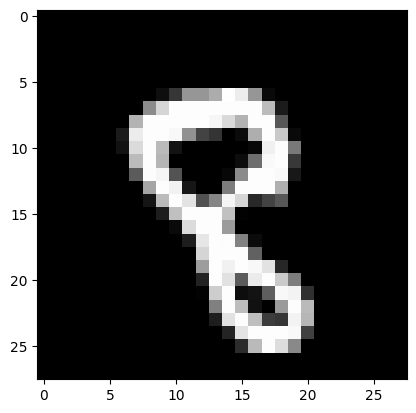

In [13]:
plt.imshow(train_X[6284], cmap = 'gray')
print(train_Y[6284])

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
img_shape = (28, 28, 1)

In [16]:
model = Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(40, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(160, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(2000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 40)        7240      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 80)        28880     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 80)        0

In [18]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [19]:
hist = model.fit(train_X, train_Y, batch_size = 900, epochs = 10, validation_split = 0.2)

Epoch 1/10
54/54 [==============================] - 615s 11s/step - loss: 1.1914 - accuracy: 0.7656 - precision: 0.8661 - recall: 0.6795 - val_loss: 0.1566 - val_accuracy: 0.9477 - val_precision: 0.9555 - val_recall: 0.9415
Epoch 2/10
54/54 [==============================] - 612s 11s/step - loss: 0.1052 - accuracy: 0.9674 - precision: 0.9719 - recall: 0.9635 - val_loss: 0.0767 - val_accuracy: 0.9767 - val_precision: 0.9799 - val_recall: 0.9743
Epoch 3/10
54/54 [==============================] - 620s 11s/step - loss: 0.0667 - accuracy: 0.9791 - precision: 0.9812 - recall: 0.9768 - val_loss: 0.0599 - val_accuracy: 0.9823 - val_precision: 0.9844 - val_recall: 0.9805
Epoch 4/10
54/54 [==============================] - 603s 11s/step - loss: 0.0476 - accuracy: 0.9850 - precision: 0.9865 - recall: 0.9833 - val_loss: 0.0491 - val_accuracy: 0.9856 - val_precision: 0.9871 - val_recall: 0.9838
Epoch 5/10
54/54 [==============================] - 598s 11s/step - loss: 0.0439 - accuracy: 0.9859 - pr

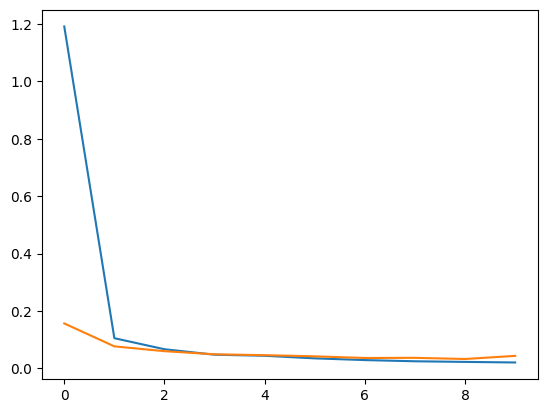

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

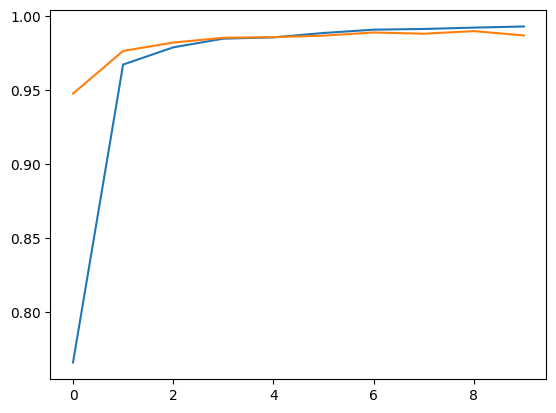

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

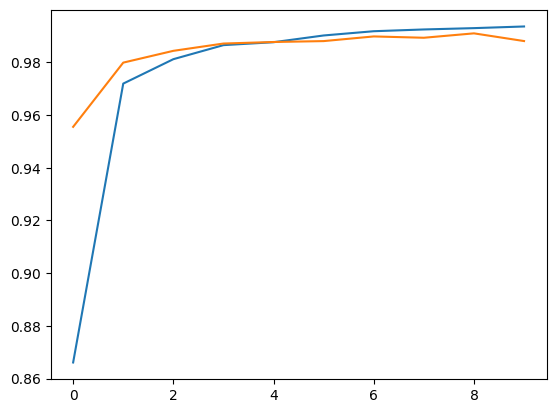

In [22]:
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])

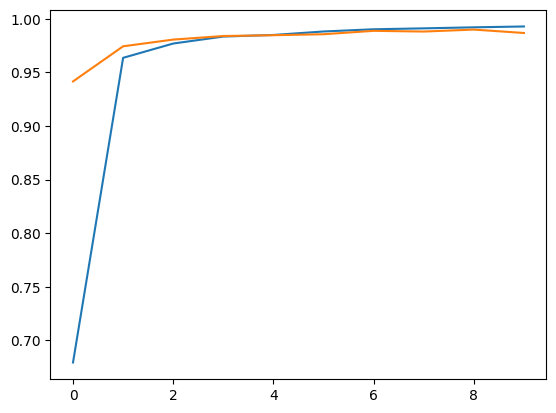

In [23]:
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])

In [24]:
print(model.predict(test_X[100].reshape(1, 28, 28, 1)), model.predict(test_X[500].reshape(1, 28, 28, 1)))
print(test_Y[100], test_Y[500])

1/1 [==============================] - 0s 58ms/step
[[5.9116179e-09 4.7603527e-15 1.2665752e-15 2.2245684e-14 7.7359598e-11
  2.2260119e-10 1.0000000e+00 1.2181140e-15 2.1840731e-10 4.2380565e-12]] [[1.9352919e-17 9.2712471e-10 5.9819320e-12 1.0000000e+00 6.1248722e-13
  3.9238515e-10 2.2533348e-17 1.2712503e-09 2.7608978e-12 4.4432311e-09]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [25]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 38s 121ms/step - loss: 0.0385 - accuracy: 0.9881 - precision: 0.9893 - recall: 0.9877


[0.03849368914961815,
 0.988099992275238,
 0.9892828464508057,
 0.9876999855041504]

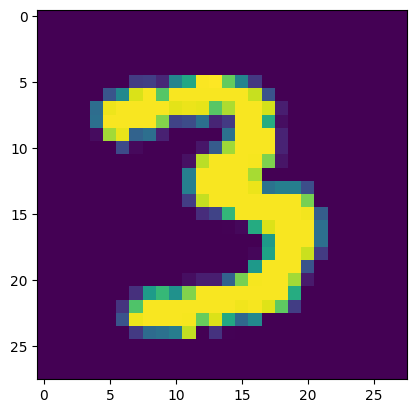

In [26]:
plt.imshow(test_X[500])

1/1 [==============================] - 0s 74ms/step
[[7.0152373e-07 4.7321688e-02 4.2869182e-05 1.8641698e-05 3.4309833e-09
  1.1690143e-11 1.9057371e-12 9.5261407e-01 2.3330083e-08 1.9889198e-06]] (1, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


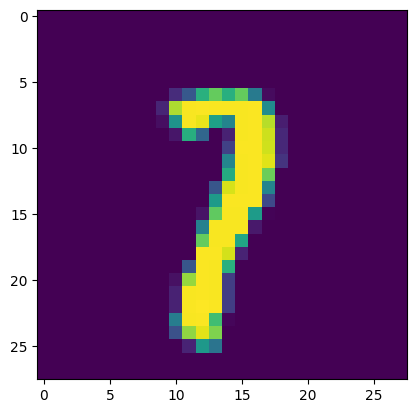

In [28]:
img = model.predict(test_X[111].reshape(1,28,28,1))
print(img, img.shape)
plt.imshow(test_X[111])
print(test_Y[111])